In [1]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt 

In [2]:
# Data preparation
df = pd.read_csv("data/water_potability.csv")
df.columns = df.columns.str.lower()
df

,ph,hardness,solids,chloramines,sulfate,conductivity,organic_carbon,trihalomethanes,turbidity,potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0
...,...,...,...,...,...,...,...,...,...,...
3271,4.668102,193.681735,47580.991603,7.166639,359.948574,526.424171,13.894419,66.687695,4.435821,1
3272,7.808856,193.553212,17329.802160,8.061362,NaN,392.449580,19.903225,NaN,2.798243,1
3273,9.419510,175.762646,33155.578218,7.350233,NaN,432.044783,11.039070,69.845400,3.298875,1
3274,5.126763,230.603758,11983.869376,6.303357,NaN,402.883113,11.168946,77.488213,4.708658,1


In [3]:
#  Checking Class Imbalance
print(df["potability"].value_counts())
print(df["potability"].value_counts(normalize=True))

potability
0    1998
1    1278
Name: count, dtype: int64
potability
0    0.60989
1    0.39011
Name: proportion, dtype: float64


In [4]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

# Imputation
imputer = SimpleImputer(strategy="median")
df_imputed = pd.DataFrame(
    imputer.fit_transform(df.drop("potability", axis=1)),
    columns=df.drop("potability", axis=1).columns,
)
df_imputed

,ph,hardness,solids,chloramines,sulfate,conductivity,organic_carbon,trihalomethanes,turbidity
0,7.036752,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135
1,3.716080,129.422921,18630.057858,6.635246,333.073546,592.885359,15.180013,56.329076,4.500656
2,8.099124,224.236259,19909.541732,9.275884,333.073546,418.606213,16.868637,66.420093,3.055934
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075
...,...,...,...,...,...,...,...,...,...
3271,4.668102,193.681735,47580.991603,7.166639,359.948574,526.424171,13.894419,66.687695,4.435821
3272,7.808856,193.553212,17329.802160,8.061362,333.073546,392.449580,19.903225,66.622485,2.798243
3273,9.419510,175.762646,33155.578218,7.350233,333.073546,432.044783,11.039070,69.845400,3.298875
3274,5.126763,230.603758,11983.869376,6.303357,333.073546,402.883113,11.168946,77.488213,4.708658


In [5]:
# Data splitting
X = df_imputed
y = df["potability"]
X_train, X_temp, y_train, y_temp = train_test_split(
    X, y, test_size=0.4, random_state=42, stratify=y
)
X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp
)

print(f"\nTraining size: {len(X_train)} ({len(X_train)/len(X)*100:.1f}%)")
print(f"Validation size: {len(X_val)} ({len(X_val)/len(X)*100:.1f}%)")
print(f"Test size: {len(X_test)} ({len(X_test)/len(X)*100:.1f}%)")


Training size: 1965 (60.0%)
Validation size: 655 (20.0%)
Test size: 656 (20.0%)


In [6]:
# Training the model
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix
import matplotlib.pyplot as plt

models = {
    "Logistic Regression": LogisticRegression(class_weight="balanced", max_iter=5000),
    "Random Forest": RandomForestClassifier(class_weight="balanced", random_state=42),
}

results = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_val)
    y_proba = model.predict_proba(X_val)[:, 1]

    results[name] = {
        "accuracy": accuracy_score(y_val, y_pred),
        "precision": precision_score(y_val, y_pred),
        "recall": recall_score(y_val, y_pred),
        "f1": f1_score(y_val, y_pred),
        "auc_roc": roc_auc_score(y_val, y_proba),
    }

# Display results
results_df = pd.DataFrame(results).T
print(results_df)

                     accuracy  precision    recall        f1   auc_roc
Logistic Regression  0.497710   0.389222  0.509804  0.441426  0.503431
Random Forest        0.671756   0.700000  0.274510  0.394366  0.680162


## Before SMOTE Accuracy  

0.00 0.389
0.05 0.672
0.10 0.672
0.15 0.672
0.20 0.672
0.25 0.672
0.30 0.672
0.35 0.672
0.40 0.672
0.45 0.672
0.50 0.672
0.55 0.672
0.60 0.672
0.65 0.672
0.70 0.672
0.75 0.672
0.80 0.672
0.85 0.672
0.90 0.672
0.95 0.672
1.00 0.672


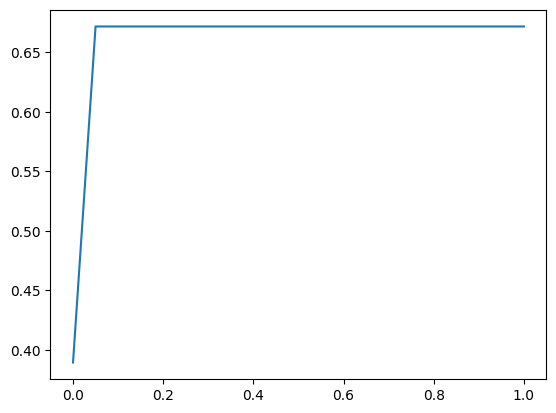

In [7]:
# accuracy
thresholds = np.linspace(0, 1, 21)
scores = []

for threadhold in thresholds:
    score = accuracy_score(y_val, y_pred >= threadhold)
    print("%.2f %.3f" % (threadhold, score))
    scores.append(score)

plt.plot(thresholds, scores)

In [8]:
from collections import Counter

true_class_label = Counter(y_val)
predicted_class_label = Counter(y_pred >= 1.0)

print("True Class Lable", true_class_label)
print("Predicted Class Label", predicted_class_label)
print("Safe water", y_val.mean())
print("Not Safe water", 1 - y_val.mean())

True Class Lable Counter({0: 400, 1: 255})
Predicted Class Label Counter({np.False_: 555, np.True_: 100})
Safe water 0.3893129770992366
Not Safe water 0.6106870229007634


In [9]:
from imblearn.over_sampling import SMOTE

# Apply SMOTE to balance classes
smote = SMOTE(
    random_state=42,
    k_neighbors=5,
)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train)
X_val_balanced, y_val_balanced = smote.fit_resample(X_val, y_val)
X_test_balanced, y_test_balanced = smote.fit_resample(X_test, y_test)


models = {
    "Logistic Regression": LogisticRegression(class_weight="balanced", max_iter=5000),
    "Random Forest":  RandomForestClassifier(
    n_estimators=200,
    max_depth=10,
    class_weight="balanced", 
    random_state=42,
),
}


results = {}
for name, model in models.items():
    model.fit(X_train_balanced, y_train_balanced)
    y_pred = model.predict(X_val_balanced)
    y_proba = model.predict_proba(X_val_balanced)[:, 1]

    results[name] = {
        "accuracy": accuracy_score(y_val_balanced, y_pred),
        "precision": precision_score(y_val_balanced, y_pred),
        "recall": recall_score(y_val_balanced, y_pred),
        "f1": f1_score(y_val_balanced, y_pred),
        "auc_roc": roc_auc_score(y_val_balanced, y_proba),
    }

# Display results
results_df = pd.DataFrame(results).T
print(results_df)

                     accuracy  precision  recall        f1   auc_roc
Logistic Regression   0.49625   0.496241   0.495  0.495620  0.503100
Random Forest         0.63750   0.664671   0.555  0.604905  0.697681


In [10]:
# accuracy
import numpy as np
thresholds = np.linspace(0, 1, 21)
scores = []

for threadhold in thresholds:
    score = accuracy_score(y_val_balanced, y_pred >= threadhold)
    print('%.2f %.3f' % (threadhold, score))
    scores.append(score)

0.00 0.500
0.05 0.637
0.10 0.637
0.15 0.637
0.20 0.637
0.25 0.637
0.30 0.637
0.35 0.637
0.40 0.637
0.45 0.637
0.50 0.637
0.55 0.637
0.60 0.637
0.65 0.637
0.70 0.637
0.75 0.637
0.80 0.637
0.85 0.637
0.90 0.637
0.95 0.637
1.00 0.637


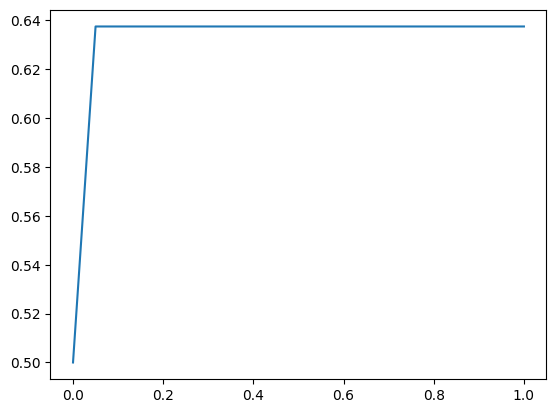

In [11]:
plt.plot(thresholds, scores)

In [12]:
from collections import Counter

Counter(y_pred >= 1.0)
Counter(y_val)
print("potable water", y_val.mean())
print("Not potable water", 1 - y_val.mean())

potable water 0.3893129770992366
Not potable water 0.6106870229007634


In [13]:
# Confusion table
actually_safe = (y_val == 1)
actually_unsafe = (y_val == 0)

t = 0.6
predict_safe = y_val >= t
predict_unsafe = y_val <= t

tp = (predict_safe & actually_safe).sum()
tn = (predict_unsafe & actually_unsafe).sum()

fp = (predict_safe & actually_unsafe).sum()
fn = (predict_unsafe & actually_safe).sum()

In [14]:
from xgboost import XGBClassifier

# Create XGBoost model with optimized parameters
xgb_model = XGBClassifier(
    n_estimators=300,  # Number of boosting rounds
    max_depth=6,  # Maximum tree depth
    learning_rate=0.1,  # Step size shrinkage (eta)
    subsample=0.8,  # Fraction of samples used per tree
    colsample_bytree=0.8,  # Fraction of features used per tree
    scale_pos_weight=1.56,  # Handle class imbalance
    gamma=0,  # Minimum loss reduction for split
    min_child_weight=1,  # Minimum sum of instance weight in child
    reg_alpha=0,  # L1 regularization
    reg_lambda=1,  # L2 regularization
    random_state=42,
    n_jobs=-1,
    eval_metric="logloss",  # Evaluation metric
)

xgb_model.fit(
    X_train_balanced,
    y_train_balanced,
    eval_set=[(X_val_balanced, y_val_balanced)],
    verbose=False,  # Set to True to see training progress
)

# Make predictions
y_pred_xgb = xgb_model.predict(X_val_balanced)
y_proba_xgb = xgb_model.predict_proba(X_val_balanced)[:, 1]

# Evaluate
print("\n" + "=" * 60)
print("XGBOOST VALIDATION SET PERFORMANCE:")
print("=" * 60)
print(f"  Accuracy:  {accuracy_score(y_val_balanced, y_pred_xgb):.4f}")
print(f"  Precision: {precision_score(y_val_balanced, y_pred_xgb):.4f}")
print(f"  Recall:    {recall_score(y_val_balanced, y_pred_xgb):.4f}")
print(f"  F1-Score:  {f1_score(y_val_balanced, y_pred_xgb):.4f}")
print(f"  AUC-ROC:   {roc_auc_score(y_val_balanced, y_proba_xgb):.4f}")

print("\n📋 Detailed Classification Report:")
print(
    classification_report(
        y_val_balanced, y_pred_xgb, target_names=["Non-Potable", "Potable"]
    )
)



XGBOOST VALIDATION SET PERFORMANCE:
  Accuracy:  0.6600
  Precision: 0.6693
  Recall:    0.6325
  F1-Score:  0.6504
  AUC-ROC:   0.7050

📋 Detailed Classification Report:
              precision    recall  f1-score   support

 Non-Potable       0.65      0.69      0.67       400
     Potable       0.67      0.63      0.65       400

    accuracy                           0.66       800
   macro avg       0.66      0.66      0.66       800
weighted avg       0.66      0.66      0.66       800



In [15]:
# Create XGBoost model with optimized parameters
xgb_model = XGBClassifier(
    n_estimators=300,  # Number of boosting rounds
    max_depth=6,  # Maximum tree depth
    learning_rate=0.1,  # Step size shrinkage (eta)
    subsample=0.8,  # Fraction of samples used per tree
    colsample_bytree=0.8,  # Fraction of features used per tree
    scale_pos_weight=1.56,  # Handle class imbalance
    gamma=0,  # Minimum loss reduction for split
    min_child_weight=1,  # Minimum sum of instance weight in child
    reg_alpha=0,  # L1 regularization
    reg_lambda=1,  # L2 regularization
    random_state=42,
    n_jobs=-1,
    eval_metric="logloss",  # Evaluation metric
)

xgb_model.fit(
    X_train_balanced,
    y_train_balanced,
    eval_set=[(X_test_balanced, y_test_balanced)],
    verbose=False,  # Set to True to see training progress
)

# Make predictions
y_pred_xgb = xgb_model.predict(X_test_balanced)
y_proba_xgb = xgb_model.predict_proba(X_test_balanced)[:, 1]


# Evaluate
print("\n" + "=" * 60)
print("XGBOOST VALIDATION SET PERFORMANCE:")
print("=" * 60)
print(f"  Accuracy:  {accuracy_score(y_test_balanced, y_pred_xgb):.4f}")
print(f"  Precision: {precision_score(y_test_balanced, y_pred_xgb):.4f}")
print(f"  Recall:    {recall_score(y_test_balanced, y_pred_xgb):.4f}")
print(f"  F1-Score:  {f1_score(y_test_balanced, y_pred_xgb):.4f}")
print(f"  AUC-ROC:   {roc_auc_score(y_test_balanced, y_proba_xgb):.4f}")

print("\n📋 Detailed Classification Report:")
print(
    classification_report(y_test_balanced, y_pred_xgb, target_names=["Non-Potable", "Potable"])
)


XGBOOST VALIDATION SET PERFORMANCE:
  Accuracy:  0.6138
  Precision: 0.6240
  Recall:    0.5725
  F1-Score:  0.5971
  AUC-ROC:   0.6629

📋 Detailed Classification Report:
              precision    recall  f1-score   support

 Non-Potable       0.61      0.66      0.63       400
     Potable       0.62      0.57      0.60       400

    accuracy                           0.61       800
   macro avg       0.61      0.61      0.61       800
weighted avg       0.61      0.61      0.61       800



## Cross Validation

In [16]:
def train(X_train, y_train):
    model = models["Random Forest"]
    model.fit(X_train, y_train)

    return model

In [17]:
model = train(X_train_balanced, y_train_balanced)

In [18]:
def predict(X_val, model):
    y_pred = model.predict_proba(X_val)[:, 1]
    return y_pred

In [19]:
y_pred = predict(X_val, model)
y_pred

array([0.59003836, 0.29615978, 0.24010679, 0.53440487, 0.5326669 ,
       0.46860698, 0.4980591 , 0.45865482, 0.4631571 , 0.32073316,
       0.51674217, 0.40674743, 0.5695148 , 0.3911365 , 0.49065499,
       0.37129251, 0.34061611, 0.42083715, 0.48735109, 0.39410676,
       0.34733118, 0.54031904, 0.3660678 , 0.49470297, 0.30434027,
       0.39444214, 0.6599487 , 0.65215258, 0.36552437, 0.30066933,
       0.46755221, 0.56087944, 0.36018536, 0.44172501, 0.4117433 ,
       0.45896022, 0.50940321, 0.49889102, 0.46466005, 0.60746502,
       0.59998797, 0.45711873, 0.55299151, 0.9055762 , 0.59846231,
       0.47799256, 0.43932377, 0.32786878, 0.29434909, 0.55895566,
       0.47510274, 0.39197008, 0.4753547 , 0.45908338, 0.41393638,
       0.31776224, 0.48858463, 0.41234151, 0.34281822, 0.49458108,
       0.56930986, 0.31414186, 0.50934161, 0.52955128, 0.53680591,
       0.52642357, 0.80971606, 0.66503323, 0.54997122, 0.62779042,
       0.40355519, 0.66729527, 0.42419233, 0.47015456, 0.45696

In [20]:
from sklearn.model_selection import KFold

kfold = KFold(n_splits=10, shuffle=True, random_state=1)

kfold.split(X_train_balanced)
# Output: <generator object _BaseKFold.split at 0x2838baf20>

train_idx, val_idx = next(kfold.split(X_train_balanced))
len(train_idx), len(val_idx)
# Output: (5070, 564)

len(X_train_balanced)
# Output: 5634

# We can use iloc to select a part of this dataframe
df_train = X_train_balanced.iloc[train_idx]
df_val = X_train_balanced.iloc[val_idx]

In [21]:
df

,ph,hardness,solids,chloramines,sulfate,conductivity,organic_carbon,trihalomethanes,turbidity,potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0
...,...,...,...,...,...,...,...,...,...,...
3271,4.668102,193.681735,47580.991603,7.166639,359.948574,526.424171,13.894419,66.687695,4.435821,1
3272,7.808856,193.553212,17329.802160,8.061362,NaN,392.449580,19.903225,NaN,2.798243,1
3273,9.419510,175.762646,33155.578218,7.350233,NaN,432.044783,11.039070,69.845400,3.298875,1
3274,5.126763,230.603758,11983.869376,6.303357,NaN,402.883113,11.168946,77.488213,4.708658,1


In [22]:
from sklearn.model_selection import KFold
from sklearn.metrics import roc_auc_score

kfold = KFold(n_splits=10, shuffle=True, random_state=1)
scores = []

for train_idx, val_idx in kfold.split(X_train_balanced):
    df_train = X_train_balanced.iloc[train_idx]
    df_val = X_train_balanced.iloc[val_idx]

    model = train(df_train, y_train_balanced)
    y_pred = predict(df_val, model)

    auc = roc_auc_score(y_val_balanced, y_pred)
    scores.append(auc)

scores

ValueError: Found input variables with inconsistent numbers of samples: [2156, 2396]

## Saving the model to pickle

In [ ]:
import pickle

C = 1.0 

output_file = "model_C=%s.bin" % C
output_file

with open(output_file, "wb") as f_out:
    pickle.dump(xgb_model, f_out)

## Loading the model with Pickle

In [ ]:
model_file = "model_C=1.0.bin"

with open(model_file, "rb") as f_in:
    model = pickle.load(f_in)  

In [ ]:
from sklearn.feature_extraction import DictVectorizer

# Test prediction
dv = DictVectorizer(sparse=False)

sample = {
    "ph": 5.584086638456089,
    "Hardness": 188.3133237696164,
    "Solids": 28748.68773904612,
    "Chloramines": 7.54486878877965,
    "Sulfate": 393.66339551509645,
    "Conductivity": 280.4679159334877,
    "Organic_carbon": 8.399734640152758,
    "Trihalomethanes": 54.917861841994466,
    "Turbidity": 2.5597082275565217,
}

X = dv.fit_transform([sample])

# Make predictions
y_pred_xgb = xgb_model.predict(X)
y_proba_xgb = xgb_model.predict_proba(X)[:, 1]


if y_proba_xgb >=0.8:
  print("Safe Water")
else:
  print("Unsafe Water")

Unsafe Water


In [ ]:
numerical = [
    "ph",
    "hardness",
    "solids",
    "chloramines",
    "sulfate",
    "conductivity",
    "organic_carbon",
    "trihalomethanes",
    "turbidity",
]
for n in numerical:
    print(df[n].describe())
    print()

count    2785.000000
mean        7.080795
std         1.594320
min         0.000000
25%         6.093092
50%         7.036752
75%         8.062066
max        14.000000
Name: ph, dtype: float64

count    3276.000000
mean      196.369496
std        32.879761
min        47.432000
25%       176.850538
50%       196.967627
75%       216.667456
max       323.124000
Name: hardness, dtype: float64

count     3276.000000
mean     22014.092526
std       8768.570828
min        320.942611
25%      15666.690297
50%      20927.833607
75%      27332.762127
max      61227.196008
Name: solids, dtype: float64

count    3276.000000
mean        7.122277
std         1.583085
min         0.352000
25%         6.127421
50%         7.130299
75%         8.114887
max        13.127000
Name: chloramines, dtype: float64

count    2495.000000
mean      333.775777
std        41.416840
min       129.000000
25%       307.699498
50%       333.073546
75%       359.950170
max       481.030642
Name: sulfate, dtype: float64